# Step 1: Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\manshisingh\AppData\Local\Temp\ipykernel_11252\3742913060.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Step 2: Load  ans Explore dataset


In [3]:
# Load data
train_data = pd.read_csv("train.csv")

test_data = pd.read_csv("test.csv")


# Quick look at the dataset
print(train_data.info())
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
print(train_data.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [5]:
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
print(train_data.tail())


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  



# Step 3: Create TotalBath feature


In [7]:
# Create a new column for total bathrooms
train_data['TotalBath'] = train_data['FullBath'] + 0.5 * train_data['HalfBath']
test_data['TotalBath'] = test_data['FullBath'] + 0.5 * test_data['HalfBath']


# Step 4: Select features and target

In [8]:
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']
X_train = train_data[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
y_train = train_data['SalePrice']
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]


# Step 4: Handle missing values in features

In [9]:

X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_test = X_test.fillna(X_test.mean())



# Step 5: Train Linear Regression model

In [10]:

model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients

print("Model trained successfully!")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Model trained successfully!
Coefficients: [   107.04103873 -27861.45842295  26337.60215196]
Intercept: 52305.36194184654


# Step 6 : Predict on test data

In [11]:
# Predict for test set

y_pred = model.predict(X_test)


# Step 7: Save predictions to CSV

In [12]:
# Create CSV with only required columns and predicted price
output = X_test.copy()
output['PredictedSalePrice'] = y_pred
output.to_csv("test_features_with_predictions.csv", index=False)

print(f"CSV file 'test_features_with_predictions.csv' created with {len(output)} rows!")

CSV file 'test_features_with_predictions.csv' created with 1459 rows!


# Step 8: Interactive prediction for a specific test row

In [ ]:
sample_index = int(input(f"Enter a row index (0 to {X_test.shape[0]-1}) from test data: "))
sample_input = X_test.iloc[[sample_index]] 
predicted_price = model.predict(sample_input)

# Print input features
print("\nInput features from test dataset:")
print(sample_input)

# Print predicted house price
print(f"\nPredicted house price: ${predicted_price[0]:,.2f}")



Input features from test dataset:
   GrLivArea  BedroomAbvGr  TotalBath
3       1604             3        2.5

Predicted house price: $206,258.82


# Step 9: Visualize predicted prices

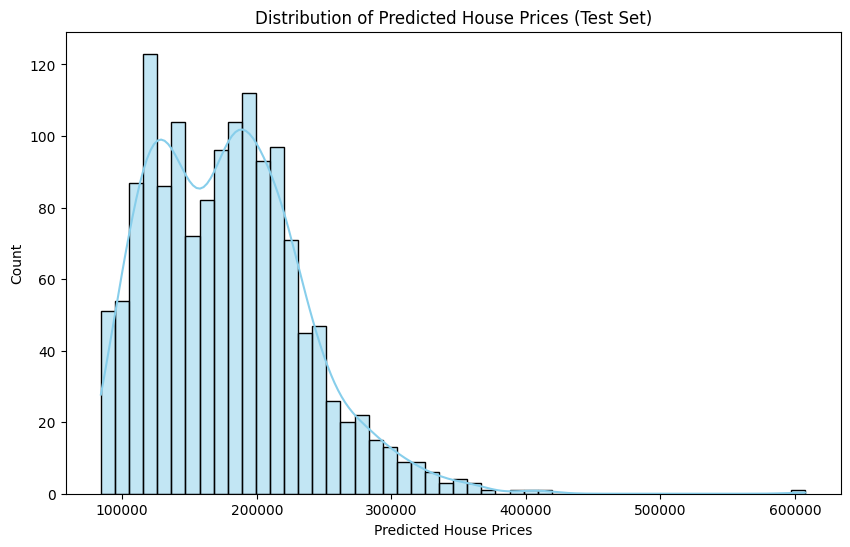

In [14]:
# Histogram of predicted prices
plt.figure(figsize=(10,6))
sns.histplot(y_pred, bins=50, kde=True, color='skyblue')
plt.xlabel("Predicted House Prices")
plt.ylabel("Count")
plt.title("Distribution of Predicted House Prices (Test Set)")
plt.show()